In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer

In [35]:
df = pd.read_csv("car_price_data.csv")

In [36]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [37]:
df.rename(columns={'MSRP': 'price'}, inplace=True)
df = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
          'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'price']]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.fillna(0, inplace=True)
df.head() 

C:\Users\Audry Barimbane\AppData\Local\Temp\ipykernel_8972\3797217051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [38]:
frequent_transmission = col['transmission_type'].mode().iloc[0]
print(frequent_transmission)

automatic


In [39]:
# Select only the numerical columns
num_col = col.select_dtypes("number")

cor_matrix = num_col.corr()

# Zero out the diagonal for ease of reading.
for i in range(cor_matrix.shape[0]):
    cor_matrix.iloc[i, i] = 0

# Find the two features with the highest correlation
max_cor_val = cor_matrix.abs().max().max()
res = cor_matrix.where(cor_matrix == max_cor_val).stack().index.tolist()[0]

print(res)

('highway_mpg', 'city_mpg')


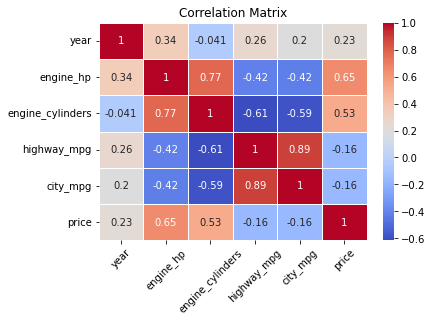

In [40]:
num_col = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_col.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()


In [41]:
mean_price = df['price'].mean()
df['above_average']=(df['price'] > mean_price).astype(int)

C:\Users\Audry Barimbane\AppData\Local\Temp\ipykernel_8972\1739750847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average']=(df['price'] > mean_price).astype(int)


In [46]:
seed = 42

train_df, temp_df = train_test_split(df, test_size=0.4, random_state=seed)
val_df, test_df = train_test_split(temp_df, test_size=0.2, random_state=seed)

def extract_features_target(dataset):
    X = dataset.drop(columns=['price'])
    y = dataset['price']
    return X, y
X_train, y_train = extract_features_target(train_df)
X_val, y_val = extract_features_target(val_df)
X_test, y_test = extract_features_target(test_df)

In [47]:
cat_col = df.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(train_df, columns=cat_col, drop_first=True)

mi_scores = mutual_info_classif(data_encoded.drop(columns=['above_average']), train_df['above_average'], random_state=42)
mi_scores_df = pd.DataFrame({'Feature': data_encoded.drop(columns=['above_average']).columns, 'MI Score': mi_scores})

mi_scores_df['Feature'] = mi_scores_df['Feature'].str.split('_', expand=True)[0]
mi_scores_df.groupby('Feature').agg({'MI Score': 'mean'}).sort_values(by='MI Score', ascending=False)

,MI Score
Feature,
price,0.589208
engine,0.234597
year,0.067564
city,0.066452
highway,0.043515
vehicle,0.007898
make,0.005536
transmission,0.003947
model,0.002377


In [48]:
# define the categorical columns
cat_col = df.select_dtypes(include=['object']).columns

# Separate the target variable (y) from the features (X)
X = df.drop('above_average', axis=1)  # Replace 'target_column' with the actual target column name
y = df['above_average']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = encoder.fit_transform(X[cat_col])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(cat_col)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Concatenate the one-hot encoded features with the remaining numeric features
X_processed = pd.concat([X.drop(cat_col, axis=1), X_encoded_df], axis=1)

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Calculate accuracy and round it to 2 decimal digits
accuracy = accuracy_score(y_valid, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9991607217792698


In [49]:
# define the categorical columns
cat_col = df.select_dtypes(include=['object']).columns

# Separate the target variable (y) from the features (X)
X = df.drop('above_average', axis=1)  # Replace 'target_column' with the actual target column name
y = df['above_average']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = encoder.fit_transform(X[cat_col])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(cat_col)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Concatenate the one-hot encoded features with the remaining numeric features
X_processed = pd.concat([X.drop(cat_col, axis=1), X_encoded_df], axis=1)

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

# Initialize RFE with Logistic Regression model as the estimator
rfe = RFE(model, n_features_to_select=1)

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Create a dictionary to store feature names and their rankings
feature_rank_dict = dict(zip(X_train.columns, feature_ranking))

# Sort features by their ranking (ascending order)
sorted_features = sorted(feature_rank_dict, key=feature_rank_dict.get)

# Print the feature with the smallest ranking (1 indicates most important)
print("The feature with the smallest ranking is:", sorted_features[0])

The feature with the smallest ranking is: year
